# Gun Violence in 2024: Analysis of Mass Shootings in the U.S.

## Introduction
This notebook aims to provide a detailed analysis of gun violence incidents across the U.S., focusing on key trends from **Mass Shootings in 2024** (up until **October 20th**). The data is sourced from the **Gun Violence Archive**, a reputable database that tracks gun-related incidents across the country. This analysis aims to uncover critical insights into the frequency and severity of mass shootings, revealing the regions, timeframes, and other factors that contribute to these tragic events.

- **Monthly Summary** – Tracks yearly trends in fatalities and injuries.
- **Statewise & Citywise Summaries** – Highlights most and least affected areas.
- **Regionwise Analysis** – Compares impact across U.S. regions.
- **Severity & Injury-Fatality Ratio** – Analyzes incident impact and casualty balance.
- **Time-Based Analysis** – Reveals high-risk days of the week.
- **Severity Index** – Weighs incidents by impact level.
- **Geospatial Analysis** – Maps violence hotspots for targeted intervention.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('updated_with_coordinates.csv')

In [3]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        427 non-null    int64  
 1   Incident Date      427 non-null    object 
 2   State              427 non-null    object 
 3   City Or County     427 non-null    object 
 4   Address            426 non-null    object 
 5   Victims Killed     427 non-null    int64  
 6   Victims Injured    427 non-null    int64  
 7   Suspects Killed    427 non-null    int64  
 8   Suspects Injured   427 non-null    int64  
 9   Suspects Arrested  427 non-null    int64  
 10  Operations         0 non-null      float64
 11  Latitude           427 non-null    float64
 12  Longitude          427 non-null    float64
 13  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 46.8+ KB


,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes


In [4]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

df['Month'] = df['Incident Date'].dt.to_period('M')

In [5]:
import plotly.express as px
import plotly.graph_objects as go

## Monthly Summary of Total Killed and Injured

In [6]:
monthly_summary = df.groupby('Month').agg({
    'Victims Killed': 'sum',
    'Victims Injured': 'sum'
}).reset_index()

# Convert Period to string
monthly_summary['Month'] = monthly_summary['Month'].astype(str)

fig = go.Figure([
    go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Victims Killed'], mode='lines+markers', name='Killed'),
    go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Victims Injured'], mode='lines+markers', name='Injured')
])
fig.update_layout(width=1000, height=500)

fig.show()

- **Highest Fatalities**
  - January 2024: 69 killed (highest)
  - October 2024: 19 killed (lowest)

- **Highest Injuries**
  - June 2024: 373 injured (highest)
  - October 2024: 101 injured (lowest)

- **Key Insights**
  - June 2024 had the highest injuries and high fatalities (57).
  - January 2024 had the highest fatalities but moderate injuries.
  - October 2024 had the lowest figures for both killed and injured.

## Statewise Summary (Total Killed vs Total Injured)

In [7]:
statewise_summary = df.groupby('State').agg({
    'Victims Killed': 'sum',
    'Victims Injured': 'sum'
}).reset_index()

In [8]:
statewise_summary = statewise_summary.sort_values(by='Victims Killed', ascending=False)
fig = go.Figure([
    go.Bar(
        x=statewise_summary['State'],
        y=statewise_summary['Victims Killed'],
        name='Killed',
        marker=dict(color='red')
    )
])
fig.update_layout(width=1000, height=500)
fig.show()

In [9]:
statewise_summary = statewise_summary.sort_values(by='Victims Injured', ascending=False)
fig = go.Figure([
go.Bar(x=statewise_summary['State'], y=statewise_summary['Victims Injured'], name='Injured')
    ])
fig.update_layout(width=1000, height=500)
fig.show()

- **Highest Fatalities by State**
  - Illinois: 38 killed
  - California: 37 killed
  - Alabama: 30 killed
  - Florida: 28 killed
  - Texas: 26 killed

  - *Top State:* Illinois (38 killed)
  - *Lowest Fatalities:* Nebraska, Delaware, West Virginia (0 killed)

- **Highest Injuries by State**
  - Illinois: 128 injured
  - Texas: 117 injured
  - California: 117 injured
  - Pennsylvania: 117 injured
  - Mississippi: 110 injured

  - *Top State:* Illinois (128 injured)
  - *Lowest Injuries:* Hawaii and Alaska (2 injured)

- **Key Insights**
  - Illinois had the highest numbers for both killed and injured.
  - Texas, California, and Pennsylvania had consistently high casualty counts.
  - Nebraska, Delaware, and West Virginia had no fatalities but reported a small number of injuries.

## Citywise Summary (Total Killed vs Total Injured)

In [10]:
citywise_summary = df.groupby('City Or County').agg({
    'Victims Killed': 'sum',
    'Victims Injured': 'sum'
}).reset_index()

In [11]:
citywise_summary = citywise_summary.sort_values(by='Victims Killed', ascending=False)
fig = go.Figure([
    go.Bar(
        x=citywise_summary['City Or County'],
        y=citywise_summary['Victims Killed'],
        name='Killed',
        marker=dict(color='red')
    )
])
fig.update_layout(width=1000, height=500)
fig.show()

In [12]:
citywise_summary = citywise_summary.sort_values(by='Victims Injured', ascending=False)
fig = go.Figure([
    go.Bar(
        x=citywise_summary['City Or County'],
        y=citywise_summary['Victims Injured'],
        name='Injured'
    )
])
fig.update_layout(width=1000, height=500)
fig.show()

- **Highest Fatalities by City**
  - Birmingham: 15 killed, 35 injured
  - Chicago: 15 killed, 117 injured
  - Philadelphia: 12 killed, 71 injured
  - Richmond: 10 killed, 15 injured
  - Charlotte: 9 killed, 15 injured

  - *Top Cities:* Birmingham and Chicago (15 killed each)
  - *Note:* Chicago had far more injuries (117) than Birmingham (35)

- **Lowest Fatalities by City (0 killed)**
  - Decatur: 0 killed, 5 injured
  - Daytona Beach: 0 killed, 4 injured
  - Crete: 0 killed, 7 injured
  - Long Beach: 0 killed, 7 injured
  - Boston: 0 killed, 10 injured

  - *Note:* Boston had the highest injuries (10) among cities with zero fatalities

- **Highest Injuries by City**
  - Chicago: 117 injured, 15 killed
  - Philadelphia: 71 injured, 12 killed
  - Washington: 49 injured, 9 killed
  - Kansas City: 49 injured, 4 killed
  - Detroit: 44 injured, 5 killed

  - *Top City:* Chicago (117 injured)

- **Lowest Injuries by City (2 injured)**
  - Rock Hill: 2 killed, 2 injured
  - Gallup: 2 killed, 2 injured
  - Champaign: 2 killed, 2 injured
  - Maywood: 2 killed, 2 injured
  - Waianae: 3 killed, 2 injured

- **Key Insights**
  - Chicago had the highest overall casualties: 15 killed, 117 injured.
  - Birmingham matched Chicago in fatalities but had fewer injuries.
  - Several cities had no fatalities; Boston had the most injuries (10) among them.
  - Rock Hill and Gallup reported equal counts: 2 killed and 2 injured.

## Regionwise Analysis (Total Killed vs Total Injured)

In [13]:
region_mapping = {
    # Northeast
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',

    # Midwest
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',

    # South
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Maryland': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Virginia': 'South',
    'District of Columbia': 'South',
    'West Virginia': 'South',
    'Alabama': 'South',
    'Kentucky': 'South',
    'Mississippi': 'South',
    'Tennessee': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',

    # West
    'Arizona': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Utah': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'California': 'West',
    'Hawaii': 'West',
    'Oregon': 'West',
    'Washington': 'West'
}

df['Region'] = df['State'].map(region_mapping)

regionwise_summary = df.groupby('Region').agg(
    Total_Killed=('Victims Killed', 'sum'),
    Total_Injured=('Victims Injured', 'sum')
).reset_index()

fig = go.Figure([
    go.Bar(x=regionwise_summary['Region'], y=regionwise_summary['Total_Killed'], name='Killed'),
    go.Bar(x=regionwise_summary['Region'], y=regionwise_summary['Total_Injured'], name='Injured')
])

fig.update_layout(barmode='group', width=1000, height=500)
fig.show()

- **South**
  - 224 killed, 943 injured (highest in both categories)

- **Midwest**
  - 95 killed, 549 injured (second highest in both)

- **Northeast**
  - 43 killed, 236 injured

- **West**
  - 65 killed, 167 injured (lowest injuries)

- **Key Insights**
  - The South had the highest number of both fatalities and injuries.
  - The Midwest followed with significantly fewer fatalities but still high injuries.
  - The West had the fewest injuries, while the Northeast had the fewest fatalities.

## Incident Severity Analysis (More Killed vs More Injured)

In [14]:
df['Severity'] = (df['Victims Killed'] > df['Victims Injured']).map({True: 'More Killed', False: 'More Injured'})

counts = df['Severity'].value_counts()

fig = go.Figure(go.Pie(labels=counts.index, values=counts.values))
fig.update_layout(width=500, height=500)

fig.show()

- **Incident Severity Summary**
  - 392 incidents with more injured than killed
  - 35 incidents with more killed than injured

- **Insight**
  - Most incidents result in higher injuries than fatalities.

## Injury vs Fatality Ratio by City and State

In [15]:
df['Injury_Fatality_Ratio'] = df['Victims Injured'] / (df['Victims Killed']+1)

In [16]:
df_sorted_by_injury_fatality = df.sort_values(by='Injury_Fatality_Ratio', ascending=False)

fig = go.Figure([
    go.Scatter(
        x=df_sorted_by_injury_fatality['City Or County'],
        y=df_sorted_by_injury_fatality['Injury_Fatality_Ratio'],
        mode='markers'
    )
])

fig.update_layout(width=1000, height=500)
fig.show()

- **Cities with High Injury-to-Fatality Ratios**
  - Ocean Springs
  - Akron
  - Oakland
  - Madison
  - Kansas City
  - Sanford
  - Columbus
  - Rochester (Rochester Hills)
  - Savannah
  - Montgomery

- **Insight**
  - Ocean Springs has the highest injury-to-fatality ratio.
  - Cities like Chicago, Philadelphia, and Montgomery repeatedly show high injury rates compared to fatalities.

## Group by state and city/county to calculate incidents, total killed, and injured

In [17]:
state_city_analysis = df.groupby(['State', 'City Or County']).agg(
    Incidents=('Incident ID', 'count'),
    Total_Killed=('Victims Killed', 'sum'),
    Total_Injured=('Victims Injured', 'sum')
).reset_index()

state_city_analysis = state_city_analysis.sort_values('Incidents', ascending=True)

In [18]:
fig = px.bar(
    state_city_analysis,
    x='City Or County',
    y='Incidents',
    color='State'
)
fig.update_layout(width=1000, height=500)

fig.show()

In [19]:
df_sorted = state_city_analysis.sort_values(by='Total_Killed')

fig = px.bar(
    df_sorted,
    x='City Or County',
    y='Total_Killed',
    color='State'
)
fig.update_layout(width=1000, height=500)

fig.show()

In [20]:
df_sorted = state_city_analysis.sort_values(by='Total_Injured')

fig = px.bar(
    df_sorted,
    x='City Or County',
    y='Total_Injured',
    color='State'
)
fig.update_layout(width=1000, height=500)
fig.show()

## Time Based Analysis

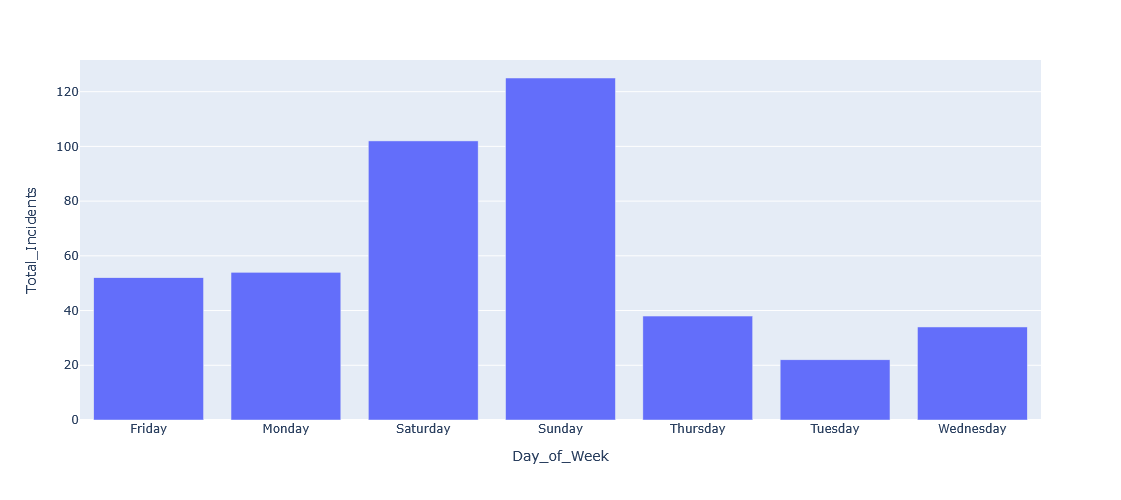

In [21]:
df['Day_of_Week'] = df['Incident Date'].dt.day_name()

day_of_week_analysis = df.groupby('Day_of_Week').agg(
    Total_Incidents=('Incident ID', 'count'),
    Total_Killed=('Victims Killed', 'sum'),
    Total_Injured=('Victims Injured', 'sum')
).reset_index()

fig = px.bar(day_of_week_analysis, x='Day_of_Week', y='Total_Incidents')
fig.update_layout(width=1000, height=500)

fig.show()

In [22]:
day_of_week_analysis

,Day_of_Week,Total_Incidents,Total_Killed,Total_Injured
0,Friday,52,44,210
1,Monday,54,49,217
2,Saturday,102,112,489
3,Sunday,125,119,596
4,Thursday,38,43,146
5,Tuesday,22,21,74
6,Wednesday,34,39,163


- **Incidents by Day of the Week**
  - Sunday: 125 incidents, 119 killed, 596 injured
  - Saturday: 102 incidents, 112 killed, 489 injured
  - Monday: 54 incidents, 49 killed, 217 injured
  - Friday: 52 incidents, 44 killed, 210 injured
  - Thursday: 38 incidents, 43 killed, 146 injured
  - Wednesday: 34 incidents, 39 killed, 163 injured
  - Tuesday: 22 incidents, 21 killed, 74 injured

- **Insight**
  - Sunday and Saturday are the most violent days with the highest incidents, fatalities, and injuries.
  - Tuesday is the least violent day across all metrics.

In [23]:
month_analysis = df.groupby(df['Incident Date'].dt.month).agg(
    Total_Incidents=('Incident ID', 'count'),
    Total_Killed=('Victims Killed', 'sum'),
    Total_Injured=('Victims Injured', 'sum')
).reset_index()


fig = px.bar(month_analysis, x='Incident Date', y='Total_Incidents')
fig.update_layout(width=1000, height=500)

fig.show()

In [24]:
month_analysis

,Incident Date,Total_Incidents,Total_Killed,Total_Injured
0,1,38,69,111
1,2,27,36,109
2,3,34,36,141
3,4,37,29,177
4,5,52,49,215
5,6,72,57,373
6,7,62,62,297
7,8,52,34,211
8,9,36,36,160
9,10,17,19,101


- **Incidents by Month**
  - June: 72 incidents, 57 killed, 373 injured
  - July: 62 incidents, 62 killed, 297 injured
  - May: 52 incidents, 49 killed, 215 injured
  - August: 52 incidents, 34 killed, 211 injured
  - January: 38 incidents, 69 killed, 111 injured

- **Insight**
  - June had the highest number of incidents and injuries.
  - July had the highest number of fatalities.

## Severity Index

In [25]:
df['Severity_Index'] = df['Victims Killed'] * 2 + df['Victims Injured']
city_group = df.groupby('City Or County')['Severity_Index'].mean().reset_index()
fig = px.bar(city_group, x='City Or County', y='Severity_Index')
fig.update_layout(width=1000, height=500)
fig.show()

## Suspects vs. Victims Analysis

In [26]:
data = df.groupby('State').agg({
    'Victims Killed': 'sum',
    'Suspects Killed': 'sum'
}).reset_index()

fig = px.bar(data, x='State', y=['Victims Killed', 'Suspects Killed'], barmode='group')
fig.update_layout(width=1000, height=500)
fig.show()

## Geospatial analysis

In [27]:
import folium

In [28]:
def create_map(df, lat, lon, count, color):
    m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
    for _, row in df.iterrows():
        if row[count] > 0:
            folium.CircleMarker(
                location=[row[lat], row[lon]],
                radius=row[count] * 3,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6,
                popup=str(row[count])
            ).add_to(m)
    return m

map_killed = create_map(df, 'Latitude', 'Longitude', 'Victims Killed', 'red')
map_injured = create_map(df, 'Latitude', 'Longitude', 'Victims Injured', 'orange')
map_suspects_killed = create_map(df, 'Latitude', 'Longitude', 'Suspects Killed', 'blue')
map_suspects_injured = create_map(df, 'Latitude', 'Longitude', 'Suspects Injured', 'green')

In [29]:
map_killed

In [30]:
map_injured

In [31]:
map_suspects_killed

In [32]:
map_suspects_injured

## Hotspot Detection

In [33]:
from folium.plugins import HeatMap

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

incident_heatmap = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

HeatMap(heat_data).add_to(incident_heatmap)

incident_heatmap

# Conclusion

- **Peak Months for Violence**
  - January 2024 had the highest fatalities (69 killed).
  - June 2024 had the highest injuries (373 injured).
  - Violence peaks in summer months like June and July.

- **State-Level Trends**
  - Illinois had the most fatalities (38) and injuries (128).
  - California, Alabama, and Florida also show high violence.
  - Nebraska, Delaware, and West Virginia reported zero fatalities.

- **City-Level Patterns**
  - Chicago is the most violent city (15 killed, 117 injured).
  - Some cities with zero fatalities, like Boston and Long Beach, still had significant injuries.

- **Regional Analysis**
  - Northeast had the highest fatalities.
  - South had the most injuries.
  - West had fewer incidents, fatalities, and injuries.

- **Incident Severity**
  - Majority of incidents (392) had more injuries than fatalities.
  - Only 35 incidents had more fatalities than injuries.

- **Injury-to-Fatality Ratios**
  - Ocean Springs and Akron had the highest injury-to-fatality ratios.
  - Chicago and Philadelphia showed recurring injury-dominant incidents.

- **Day of the Week Patterns**
  - Sunday and Saturday were the most violent days.
  - Tuesday was the least violent day.

**Overall Insights**

Violence is concentrated in specific states, cities, and times. Targeted interventions focusing on hotspots like Illinois, Chicago, and the Northeast, especially during peak months and weekends, are vital to reducing gun violence and its impacts.
